In [15]:
import numpy as np
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

# ReLU Activation Function

In [16]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = np.maximum(0, inputs)
print("Output of ReLU function:", outputs)

Output of ReLU function: [0.  2.  0.  3.3 0.  1.1 2.2 0. ]


# Creating class for ReLU Activation Function

In [17]:
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

activation_relu = Activation_ReLU()
activation_relu.forward(inputs)
print(activation_relu.output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


# Softmax Activation Function

In [18]:
inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=1)

print(probabilities)
print(np.sum(probabilities, axis=1))

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]
[1. 1. 1.]


# Creating class for Softmax Activation Function

In [19]:
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

activation_softmax = Activation_Softmax()
activation_softmax.forward(inputs)
print(activation_softmax.output)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


# Training a neural network with ReLU and Softmax activation functions using the spiral dataset

# Layer Dense Class

In [20]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.n_inputs = n_inputs
    self.n_neurons = n_neurons
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# Importing the spiral dataset

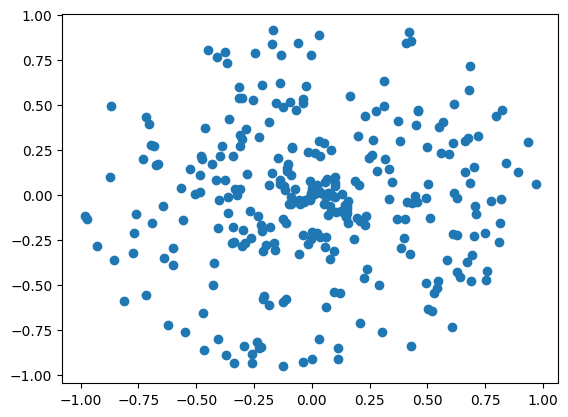

In [21]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

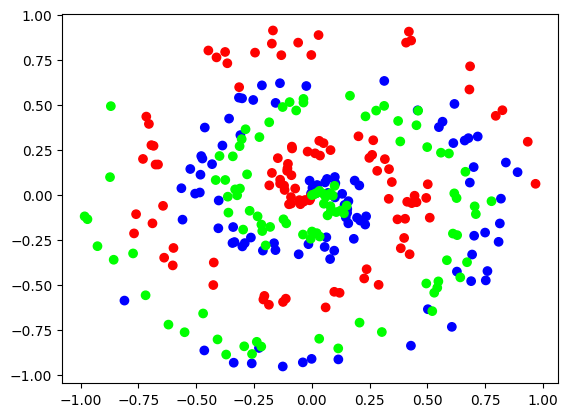

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

# Computing using the classes made above

In [29]:
# Layer 1
layer_dense1 = Layer_Dense(2, 3)
activation1_relu = Activation_ReLU()

# Layer 2
layer_dense2 = Layer_Dense(3, 3)
activation2_softmax = Activation_Softmax()

layer_dense1.forward(X)
activation1_relu.forward(layer_dense1.output)

layer_dense2.forward(activation1_relu.output)
activation2_softmax.forward(layer_dense2.output)

print(activation2_softmax.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33333442 0.33333264 0.33333295]
 [0.33333326 0.33333307 0.33333367]
 [0.33333584 0.33333172 0.33333244]
 [0.33333689 0.33333105 0.33333207]]
